1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:
import pandas as pd

df =pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [2]:
#set 'No' to 0.0, 'Yes' to 1.0

df_default = pd.get_dummies(df['default'])
df_default.drop('No', inplace=True, axis=1)
df_default = df_default.rename(columns={'Yes': 'default'})

df_student = pd.get_dummies(df['student'])
df_student.drop('No', inplace=True, axis=1)
df_student = df_student.rename(columns={'Yes': 'student'})

df_final = pd.concat([df_default,df_student,df[['balance','income']]],axis=1)
df_final.head()

,default,student,balance,income
0,0.0,0.0,729.526495,44361.625074
1,0.0,1.0,817.180407,12106.134700
2,0.0,0.0,1073.549164,31767.138947
3,0.0,0.0,529.250605,35704.493935
4,0.0,0.0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

/Users/cindyzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


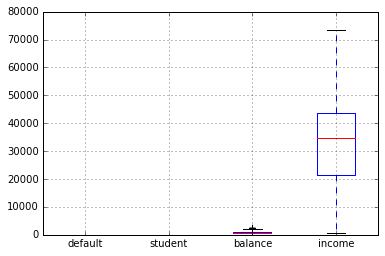

In [3]:

import pylab as plt
%matplotlib inline

fig1 = df_final.boxplot()
plt.show(fig1)

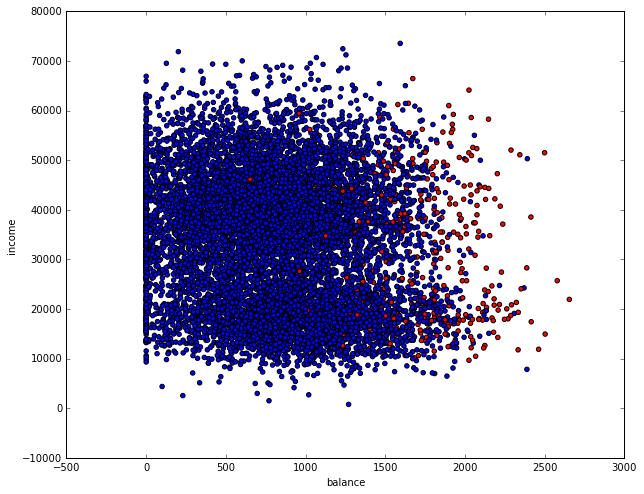

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
colors = {'Yes':'red', 'No':'blue'}
plt.xlabel('balance')
plt.ylabel('income')
ax.scatter(df_final['balance'], df_final['income'], c=df['default'].apply(lambda x: colors[x]))
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

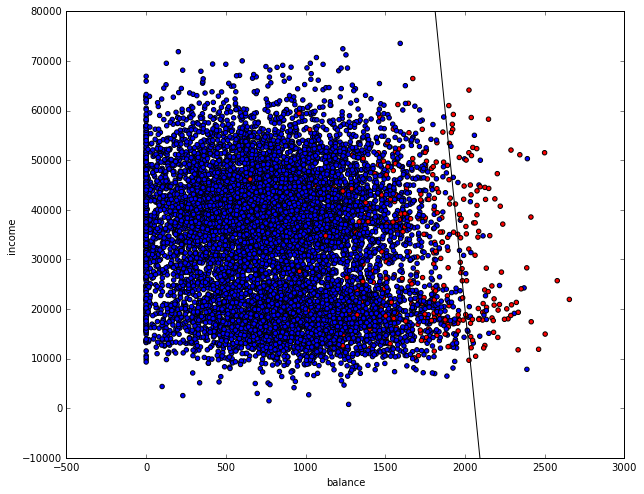

In [13]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

#train the model using Logistic Regression
X = df_final[['balance','income']]
y = df_final['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = LogisticRegression(penalty='l1')
regr.fit(X_train, y_train)

#Plot the data points
fig, ax = plt.subplots(figsize=(10,8))
colors = {'Yes':'r', 'No':'b'}
plt.xlabel('balance')
plt.ylabel('income')
ax.scatter(df_final['balance'], df_final['income'], c=df['default'].apply(lambda x: colors[x]))

#Plot the decision boundary
b = regr.intercept_
coef = regr.coef_[0]

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

x = np.arange(x_min, x_max, 1)
y = (b + coef[0] * x) / -coef[1]

plt.plot(x, y,c='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

Area under the ROC curve : 0.940299


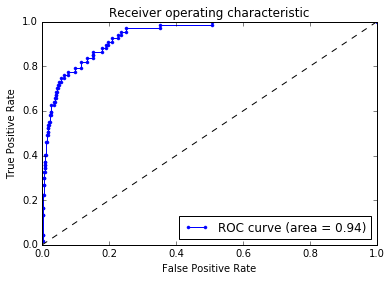

In [6]:
from sklearn.metrics import roc_curve, auc

#Compute the AUC ROC
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

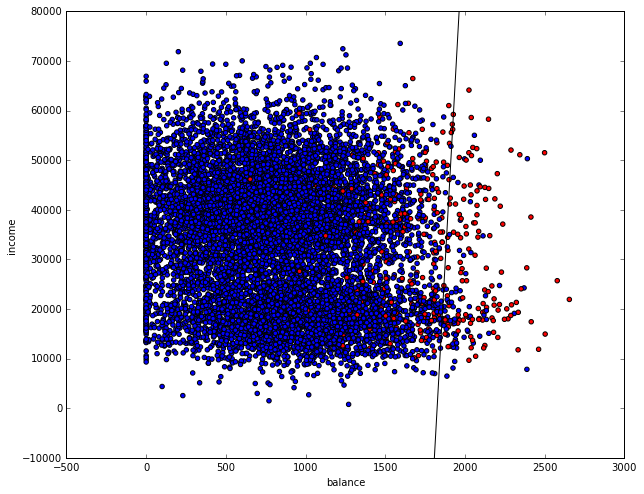

In [19]:


X = df_final[['balance','income','student']]
y = df_final['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = LogisticRegression(penalty='l1')
regr.fit(X_train, y_train)

#Plot the data points
fig, ax = plt.subplots(figsize=(10,8))
colors = {'Yes':'r', 'No':'b'}
plt.xlabel('balance')
plt.ylabel('income')
ax.scatter(df_final['balance'], df_final['income'], c=df['default'].apply(lambda x: colors[x]))

#Plot the decision boundary
b = regr.intercept_
coef = regr.coef_[0]

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

x = np.arange(x_min, x_max, 1)
y = (b + coef[0] * x) / -coef[1]

plt.plot(x, y,c='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


In [59]:

X = df_final[['balance','income','student']]
y = df_final['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create linear regression object
alphas = np.logspace(-3,0,20)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))


In [21]:
alpha_best = alphas[np.argmax(scores)]
print(alpha_best)

0.695192796178


Area under the ROC curve : 0.953559


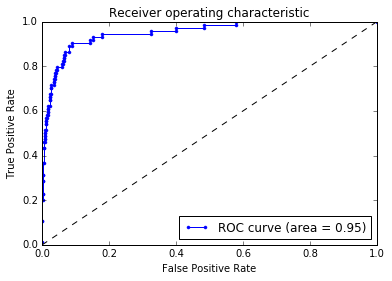

In [22]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=alpha_best,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

[[  3.45645345e-04  -1.25135936e-04  -2.68834015e-06]]


/Users/cindyzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


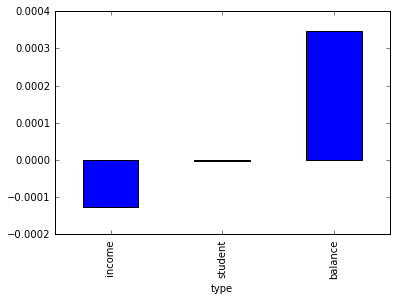

In [28]:
#Plot the ranking of the coefficients
clf =  LogisticRegression(C=alpha_best,penalty='l2').fit(X_train,y_train)
print(clf.coef_)
df_Coeff = pd.DataFrame({'type':['balance','income','student'], 'coef':clf.coef_[0]})
df_Coeff2 = df_Coeff.groupby('type')['coef'].mean()
df_Coeff2.sort('coef')
df_Coeff2.plot(x='type',y='coef',kind='bar')
plt.show()

Answer: The optimal regularization parameter : 0.695192796178
The area under ROC curve is 0.940299 before adding "student" to X, and the area under ROC curve is 0.953559 after adding "student" to the variable, so the performance improves a little by adding a variable.

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

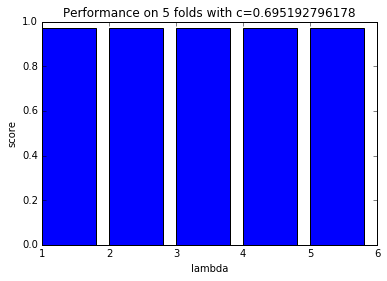

In [29]:
from sklearn.model_selection import cross_val_score
regr = LogisticRegression(C=alpha_best,penalty = 'l2')
scores = cross_val_score(regr, X, y, cv=5)
plt.xlabel('lambda')
plt.ylabel('score')
plt.title('Performance on 5 folds with c=' + str(alpha_best))
plt.bar(range(1,6),scores)
plt.show()

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [31]:
# Import the necessary modules and libraries
import os
import subprocess
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from IPython.display import Image


def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
        
        
X = df_final[['student','balance','income']]
y = df_final['default']

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)



print(__doc__)


%matplotlib inline


# Fit regression model
regr = DecisionTreeClassifier(max_depth=5)
regr.fit(X_train, y_train)


# Predict

y = regr.predict(X_test)


dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regr, feature_names=['x'])


dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

ImportError: No module named 'graphviz'

8) Find the optimal decision tree depth and compute the AUC ROC. 

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

scores = []
depths = []

for depth in range(1,101):
    
    dt=DecisionTreeRegressor(max_depth=depth)
    # Train the model using the training sets
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test,y_test))
    depths.append(depth)
    
depth_best = depths[np.argmax(scores)]
print(depth_best)

2


Area under the ROC curve : 0.937161


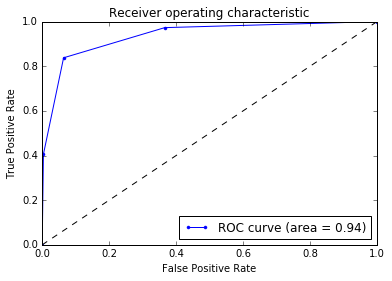

In [58]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth=depth_best,criterion='entropy')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Answer: The optimal decision tree depth is 2, and the area under ROC curve based on that depth is 0.937161